<a href="https://colab.research.google.com/github/Omkarrasale34/Home-price/blob/main/ML_home_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving House Price Prediction Dataset.csv to House Price Prediction Dataset (4).csv


In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('House Price Prediction Dataset.csv')
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [ ]:
df.shape

(2000, 10)

In [ ]:
df.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [ ]:
df.size


20000

In [ ]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [ ]:
df.isnull().sum()

,0
Id,0
Area,0
Bedrooms,0
Bathrooms,0
Floors,0
YearBuilt,0
Location,0
Condition,0
Garage,0
Price,0


In [ ]:
df.columns=df.columns.str.strip()

In [ ]:
df.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

In [ ]:
categorical_col = df.select_dtypes(include=['object']).columns
for col in categorical_col :
  print(f"Column '{col}':{df[col].unique()} ")

Column 'Location':['Downtown' 'Suburban' 'Urban' 'Rural'] 
Column 'Condition':['Excellent' 'Good' 'Fair' 'Poor'] 
Column 'Garage':['No' 'Yes'] 


In [ ]:
df['Condition'].unique()

array(['Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

In [ ]:
df['Location'].unique()

array(['Downtown', 'Suburban', 'Urban', 'Rural'], dtype=object)

In [ ]:
# remove unnecessary columns

df=df.drop(columns=['Id'])

In [ ]:
# feature and target separation

x=df.drop(columns=['Price'])
y=df['Price']

# x contains all input feature
# y contains target variable


In [ ]:
# train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(1600, 8)

In [ ]:
x_test.shape

(400, 8)

In [ ]:
x_train.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage
968,4483,4,4,3,1933,Urban,Excellent,No
240,1062,3,3,1,1970,Downtown,Good,No
819,1422,3,4,1,1993,Urban,Good,Yes
692,2658,2,3,1,1972,Rural,Poor,Yes
420,3286,2,4,1,1981,Rural,Excellent,Yes


In [ ]:
x_train.dtypes

,0
Area,int64
Bedrooms,int64
Bathrooms,int64
Floors,int64
YearBuilt,int64
Location,object
Condition,object
Garage,object


In [ ]:
# liner model and reguralization are sensitive to feature
# Scalar Type so before we regression we encode categoricals and scal numericals

In [ ]:
categorical_col=['Location','Condition','Garage']
numerical_col=x_train.drop(columns=categorical_col).columns

In [ ]:
categorical_col, numerical_col

(['Location', 'Condition', 'Garage'],
 Index(['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt'], dtype='object'))

In [ ]:
# we use oneHotEncoder cuz regression needs numbers
# it increases features = set up regularization need

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# ColumnTransformer is to apply d/f preprocessingsteps to d/f columns in one go because  numerical cols need scaling, catagorical cols need encoding,
# so we should not treat all columns the same

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numerical_col),
        ('cat',OneHotEncoder(drop='first'),categorical_col)
    ]
)

#transformer =[]
# this is list of rules
# each rules follows this feather_formate (name,transfomer,columns)


In [ ]:
x_train_processed=preprocessor.fit_transform(x_train)
x_test_processed=preprocessor.transform(x_test)

In [ ]:
x_train_processed.shape

(1600, 12)

In [ ]:
x_test_processed.shape


(400, 12)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_processed,y_train)

LinearRegression()

In [ ]:
y_train_pred=lr.predict(x_train_processed)
y_test_pred=lr.predict(x_test_processed)

# predicting on both so
# train prediction - check how well model learned
# test prediction - check how well model generalizes

# we predict on traing data to see learning, in test to see the real world performance

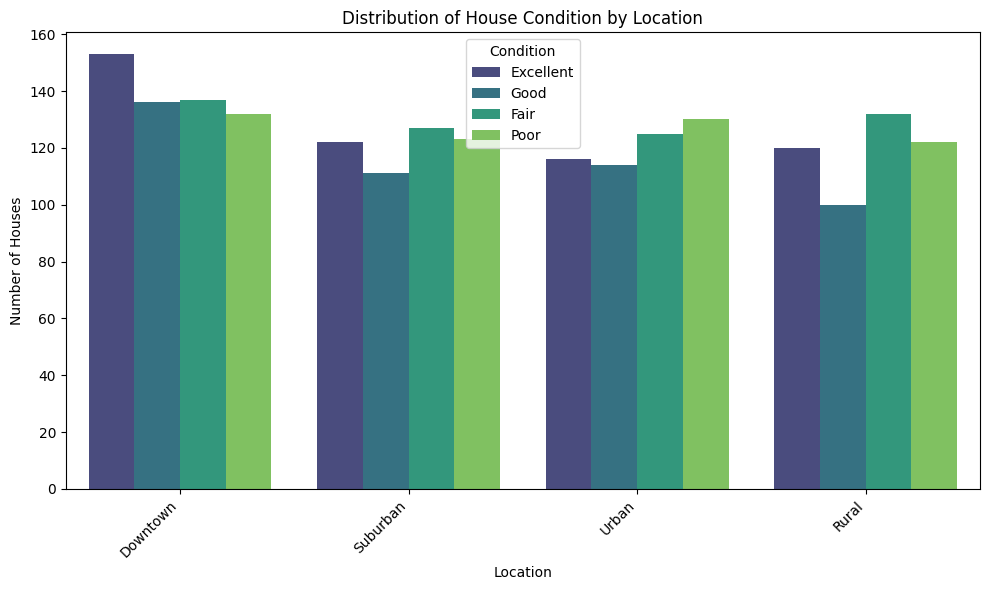

In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Location', hue='Condition', palette='viridis')
plt.title('Distribution of House Condition by Location')
plt.xlabel('Location')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1428431601.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Location', y='Price', data=df, palette='viridis')


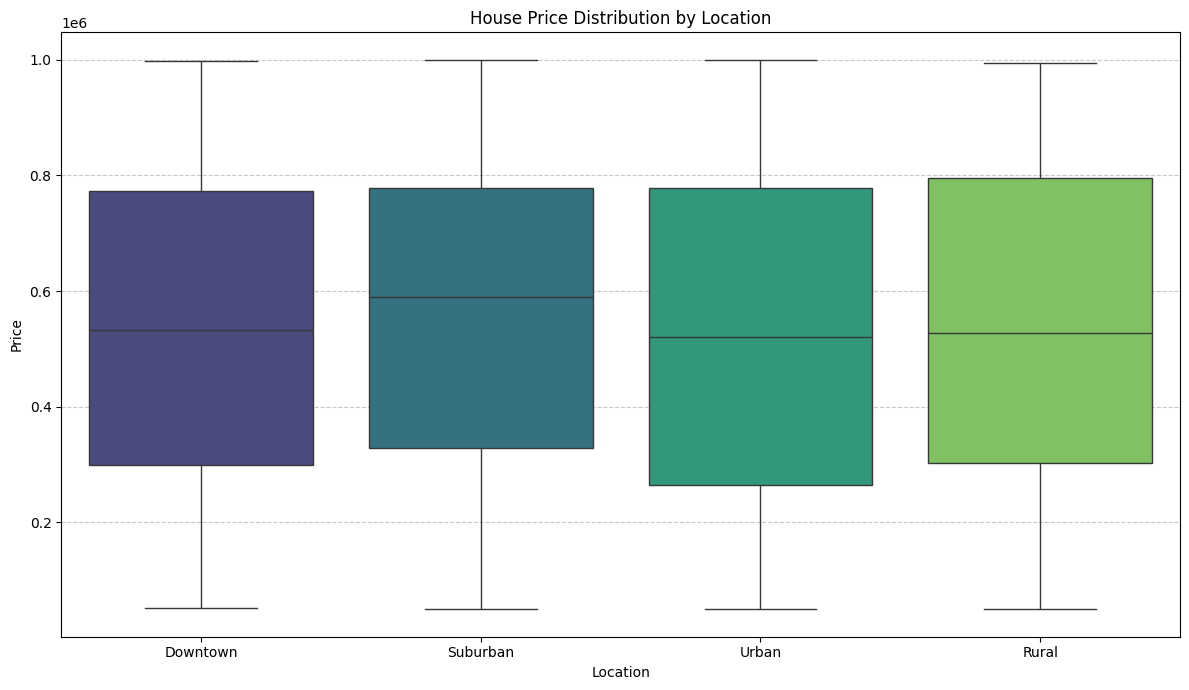

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Location', y='Price', data=df, palette='viridis')
plt.title('House Price Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# error and residual interpretation

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# the reason for using mae, mse, rmse, r2 is that we never judge a
# model by accuracy in LinearRegression
# here we used error based metrics

mae= mean_absolute_error(y_test,y_test_pred)
mse=mean_squared_error(y_test,y_test_pred)
rmse=np.sqrt(mse)
r2 = r2_score(y_test,y_test_pred)


print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2:",r2)

MAE: 243241.97758826384
MSE: 78321466146.0328
RMSE: 279859.72583784326
R2: -0.006717808430749761


In [ ]:
# Regulariztion (ridge and lasso)
#ridge regression
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1.0)
ridge.fit(x_train_processed,y_train)

y_train_pred=ridge.predict(x_train_processed)
y_test_pred=ridge.predict(x_test_processed)

In [ ]:
from sklearn.metrics import r2_score

ridge_train_r2 = r2_score(y_train, y_train_pred)
ridge_test_r2 = r2_score(y_test, y_test_pred)

ridge_train_r2, ridge_test_r2

(0.009856156591055543, -0.006715935063532852)

In [ ]:
#lasso regression
#ridge reduces the impact of useless feature while lasso can completly
#eliminate useless features
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1,max_iter=10000)
lasso.fit(x_train_processed,y_train)
y_train_pred=lasso.predict(x_train_processed)
y_test_pred=lasso.predict(x_test_processed)




In [ ]:
from sklearn.linear_model import Lasso

train_r2_lasso = r2_score(y_train, y_train_pred)
test_r2_lasso = r2_score(y_test, y_test_pred)

train_r2_lasso, test_r2_lasso

(0.009856184363990605, -0.006715988317251176)

In [ ]:
# underfitting, properfitting, overfitting

# underfitting - linear regression - train score-low , test score-low
# properfitting - linear regression - train score-good, test score-good
# overfitting - linear regression - train score-veryhigh, test score-low

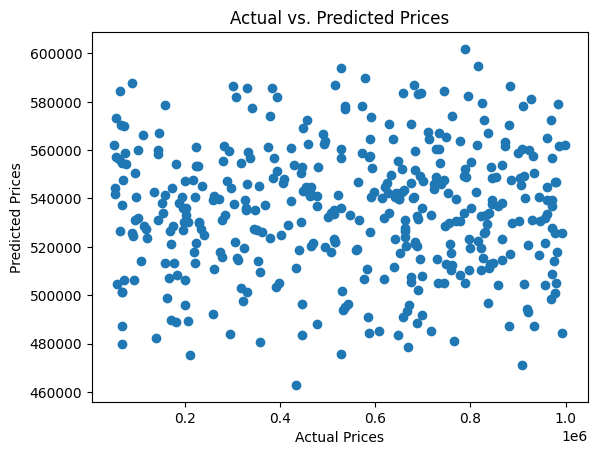

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()